In [16]:
#files
import sys
#from os import listdir
sys.path.append('../data')
sys.path.append('../Librerias')
#from os.path import isfile, join

#own libs
import utils
import caract as dc
import dataset as ds
from RNN_model import SimpleRNN
import utils_2 as ut2
from traindata import trainData



#data and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler

sns.set_style("darkgrid")


import numpy as np
import random
import os, errno
from tqdm import tqdm

import torch
import torch.nn as nn
from torch import optim


np.random.seed(seed=77)
torch.manual_seed(77)

In [25]:
#fpath = "/Users/consu/OneDrive/Documentos/GitHub/Tesis/data/low/"
fpath = "/Users/granosftp/Documents/GitHub/Tesis/data/low/"
fname = "file1_080124.mat"
#cutoff = [8/1000, 11/1000]

data = trainData(fpath, fname, 'Amplitude')
train, val, test = data.split_data('Amplitude')

### **scalers**

In [26]:
train = utils.subsample(train, 2)
val = utils.subsample(val, 2)
test = utils.subsample(test, 2)

In [27]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train.reshape(-1, 1))
val_scaled = scaler.transform(val.reshape(-1, 1))
test_scaled = scaler.transform(test.reshape(-1, 1))

In [28]:
train.shape, val.shape, test.shape

((210000,), (45000,), (45000,))

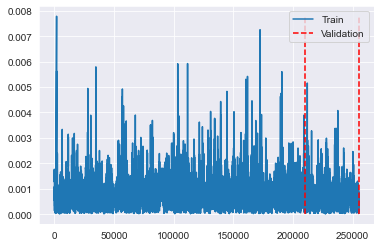

In [29]:
plt.plot(np.hstack((train, val)))
plt.vlines([len(train), len(train)+len(val)], ymin = min(train), ymax = max(train), colors='r', linestyles='dashed')
plt.legend(['Train', 'Validation', 'Test'])
plt.show()


In [22]:
'''x_train, y_train = ut2.create_sequences(train_scaled[:30000], 1000, 50)
x_val, y_val = ut2.create_sequences(val_scaled[:5000], 1000, 50)
x_test, y_test = ut2.create_sequences(test_scaled[:5000], 1000, 50)'''

'x_train, y_train = ut2.create_sequences(train_scaled[:30000], 1000, 50)\nx_val, y_val = ut2.create_sequences(val_scaled[:5000], 1000, 50)\nx_test, y_test = ut2.create_sequences(test_scaled[:5000], 1000, 50)'

In [32]:
x_train, y_train = ut2.create_sequences(train_scaled, 1000, 50)
x_val, y_val = ut2.create_sequences(val_scaled, 1000, 50)
x_test, y_test = ut2.create_sequences(test_scaled, 1000, 50)

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((208951, 1000, 1),
 (208951, 50, 1),
 (43951, 1000, 1),
 (43951, 50, 1),
 (43951, 1000, 1),
 (43951, 50, 1))

In [33]:
x_train = torch.from_numpy(x_train.astype(np.float32)).squeeze()
y_train = torch.from_numpy(y_train.astype(np.float32)).squeeze()
x_val = torch.from_numpy(x_val.astype(np.float32)).squeeze()
y_val = torch.from_numpy(y_val.astype(np.float32)).squeeze()
x_test = torch.from_numpy(x_test.astype(np.float32)).squeeze()
y_test = torch.from_numpy(y_test.astype(np.float32)).squeeze()

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

(torch.Size([208951, 1000]),
 torch.Size([208951, 50]),
 torch.Size([43951, 1000]),
 torch.Size([43951, 50]),
 torch.Size([43951, 1000]),
 torch.Size([43951, 50]))

## **Multi Step**

In [34]:
input_dim = x_train.shape[-1]
out_size = y_train.shape[-1]
hid_size = x_train.shape[-1]//2
n_layers = 2

model = SimpleRNN(input_dim, hid_size, out_size, n_layers)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

In [35]:
train_loss, test_loss = ut2.simpleTrain_model(model,
                                            criterion,
                                            optimizer,
                                            x_train,
                                            x_val,
                                            y_train,
                                            y_val,
                                            epochs=200)

  0%|          | 0/200 [00:00<?, ?it/s]

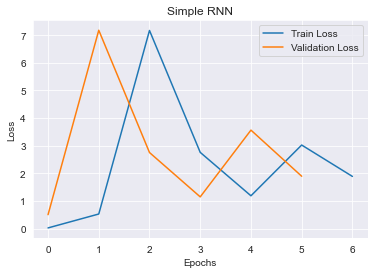

In [ ]:
ut2.plot_loss(train_loss, test_loss, 'Simple RNN')

In [ ]:
val_loss = np.asanyarray(test_loss)
train_loss = np.asanyarray(train_loss)
np.savetxt("train_lossMultiRNN.csv", train_loss, delimiter=",")
np.savetxt("val_lossMultiRNN.csv", val_loss, delimiter=",")

### **test predictions**

In [ ]:
test_pred = model(x_test)

In [ ]:
test_pred.size()

torch.Size([43951, 50])

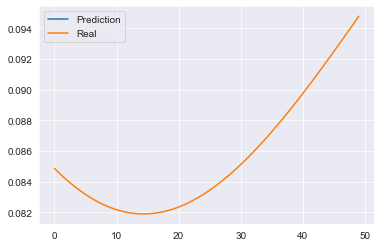

In [ ]:
i = 250

plt.plot(test_pred[i].detach().numpy(), label='Prediction')
plt.plot(y_test[i].detach().numpy(), label='Real')
plt.legend()
plt.show()